In [48]:
import numpy as np
import scipy
from random import choice

Define partial trace and Hermitian conjugate function

Pauli matrices etc

In [49]:
X = np.array([[0,1],
              [1,0]])

Y = np.array([[0,-1j],
              [1j,0]])

Z = np.array([[1,0],
              [0,-1]])

I = np.array([[1,0],
              [0,1]])

swap = np.array([[1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1]])

_three_qubit_swap_q0_q2 = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

swap_02 = np.kron(_three_qubit_swap_q0_q2,I)
swap_13 = np.kron(I,_three_qubit_swap_q0_q2)
swap_2 = swap_02 @ swap_13
print(swap_2)

XX = np.kron(X,X)
YY = np.kron(Y,Y)
ZZ = np.kron(Z,Z)


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [50]:
def ptrace(matrix,index=1,n1=4,n2=4):
    # Partial trace function for density matrices.
    current_tensor=matrix.reshape([n1, n2, n1, n2])
    if index == 1:
        return np.trace(current_tensor, axis1=1, axis2=3)
    elif index == 2:
        return np.trace(current_tensor, axis1=0, axis2=2)
    else:
        print('Error')

def dagger(u):
    return np.asarray(np.matrix(u).H)

from scipy.linalg import sqrtm
def fidelity(rho1, rho2):
    # Compute the square root of the first density matrix
    sqrt_rho1 = sqrtm(rho1)
    # Compute the matrix product of sqrt(rho1) * rho2 * sqrt(rho1)
    product = sqrt_rho1 @ rho2 @ sqrt_rho1    
    # Compute the square root of the product matrix
    sqrt_product = sqrtm(product)    
    return np.real(np.trace(sqrt_product)) ** 2

def measure(psi, projectors=None):
    if projectors is None:
        # Default to computational basis projectors for a qubit
        projectors = [np.array([[1, 0], [0, 0]]),  # |0⟩⟨0|
                      np.array([[0, 0], [0, 1]])]  # |1⟩⟨1|
    
    probs = [np.vdot(psi, P @ psi).real for P in projectors]
    outcome = choice(len(projectors), p=probs)
    return outcome



Define the qubit initial density matrices

In [51]:
# Computational state |00⟩
state_00 = np.array([1, 0, 0, 0])  # Basis: |00⟩, |01⟩, |10⟩, |11⟩
rho_plus = np.outer(state_00, state_00.conj().T)

# First Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)
bell_state = np.array([1, 0, 0, 1]) / np.sqrt(2)
rho_0 = np.outer(bell_state, bell_state.conj().T)

t = 0.2

Define the unitaries

In [52]:
def U_rho(t,rho):
    return scipy.linalg.expm(-1j*t*rho)

In [53]:
# Native SWAP
def U(t):
    return scipy.linalg.expm(-1j*t*swap_2)
np.round(U(t) @ np.kron(rho_0,rho_plus) @ dagger (U(t)),3)

array([[0.5 +0.j   , 0.  +0.j   , 0.  +0.j   , 0.02+0.097j, 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.48-0.097j, 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   ],
       [0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   ],
       [0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   ],
       [0.02-0.097j, 0.  +0.j   , 0.  +0.j   , 0.02+0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   , 0.  +0.j   , 0.  -0.097j, 0.  +0.j   , 0.  +0.j   ,
        0.  +0.j   ],
       [0.  +0.j   , 0.  +0.j   , 0.

In [54]:
II = np.kron(I,I)
IX = np.kron(I,X)
def qme(state,u):
    gate = choice([II,IX])
    return gate @ u @ state @ dagger(u) @ dagger(gate)

In [55]:
num_tomo = 100
num_muq = 100
from matplotlib import cm
color = cm.rainbow(np.linspace(1, 0, num_muq))



In [56]:
dme_state = np.kron(rho_0,rho_plus)
dme_W_states = []
# Normal DME
for muq in range(1,num_muq):
    _t = t/muq
    u = U(_t)
    dme_state = np.kron(rho_0,rho_plus)
    for i in range(muq):
        dme_state = u @ dme_state @ dagger(u)
        rho_W = ptrace(dme_state)
        dme_state = np.kron(rho_W,rho_plus)
    dme_W_states.append(rho_W)

In [57]:
_U = U_rho(t,rho_plus)
expected_state = _U @ rho_0 @ dagger(_U)
print(np.round(expected_state,3))

[[0.5 +0.j    0.  +0.j    0.  +0.j    0.49-0.099j]
 [0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j   ]
 [0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j   ]
 [0.49+0.099j 0.  +0.j    0.  +0.j    0.5 +0.j   ]]


In [58]:
norm_dme = [np.linalg.norm(expected_state-state) for state in dme_W_states]

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "text.usetex": True, # Remove this line if your code doesn't run/ take too long
    "font.family": "serif",
    "figure.dpi": 100,
    "font.size": 14
})

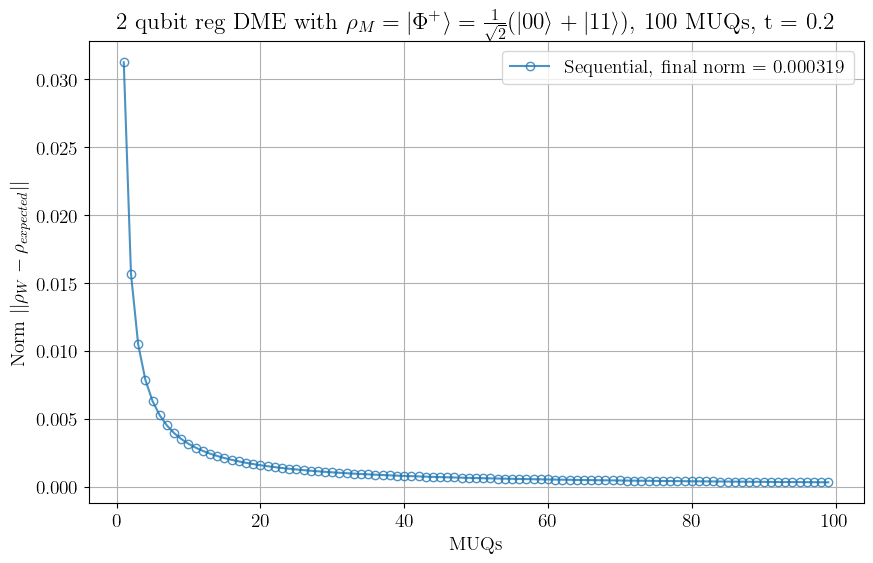

In [60]:
plt.plot(range(1,num_muq),norm_dme,marker='o',markerfacecolor='none',alpha=0.8,label=f'Sequential, final norm = {float('%.3g' % norm_dme[-1])}')
plt.xlabel('MUQs')
plt.ylabel(r'Norm $|| \rho_W - \rho_{expected} ||$')
plt.grid()
plt.title(r'2 qubit reg DME with $\rho_M = |\Phi^+ \rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, '+f'{num_muq} MUQs, t = {t}')
plt.legend()

In [61]:
from qibo import *
from qibo.transpiler.unitary_decompositions import two_qubit_decomposition

In [65]:

n = 2
M = 4
t = 0.2

qibo_states = []
for muq in range(1,M+1):
    
    print(f'Number of muq = {muq}')
    delta = t/muq
    c = Circuit((muq+1) * n,density_matrix=True)
    # initializationn
    c.add(gates.H(0))
    c.add(gates.CNOT(0,1))  
    for _i in range(n,(muq+1)*n,n):
        print(f'Current muq = {int(_i/n)}')
        
        # find the swap
        delta_swap = scipy.linalg.expm(-1j* gates.SWAP(0,1).matrix()* delta)

        # swap each qubit in work with instruction ie 0 with n, 1 with n+1
        for qubit in range(n):
            for decomposed_gate in two_qubit_decomposition(
                qubit,_i+qubit,unitary=delta_swap):
                c.add(decomposed_gate)
    
    for qubit in range(n):
        c.add(gates.X(qubit))
        c.add(gates.S(qubit))
        c.add(gates.X(qubit))
    c.execute()
    current_state = ptrace(c.final_state.state(),n1=4,n2=4**muq)
    qibo_states.append(current_state) 

Number of muq = 1
Current muq = 1
Number of muq = 2
Current muq = 1
Current muq = 2
Number of muq = 3
Current muq = 1
Current muq = 2
Current muq = 3
Number of muq = 4
Current muq = 1
Current muq = 2
Current muq = 3
Current muq = 4


In [67]:
norm_qibo = [np.linalg.norm(expected_state-state) for state in qibo_states]

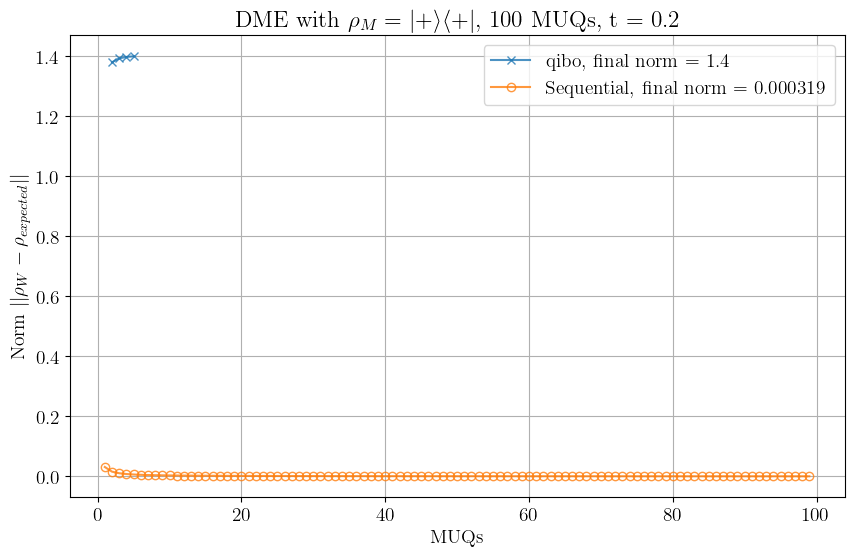

In [68]:
plt.plot(range(n,M+n),norm_qibo,marker='x',alpha=0.8,label=f'qibo, final norm = {float('%.3g' % norm_qibo[-1])}')
plt.plot(range(1,num_muq),norm_dme,marker='o',markerfacecolor='none',alpha=0.8,label=f'Sequential, final norm = {float('%.3g' % norm_dme[-1])}')
plt.xlabel('MUQs')
plt.ylabel(r'Norm $|| \rho_W - \rho_{expected} ||$')
plt.grid()
plt.title(r'DME with $\rho_M = |+\rangle \langle +|$, '+f'{num_muq} MUQs, t = {t}')
plt.legend()

In [69]:
c = Circuit(2)
c.add(gates.H(0))
c.add(gates.CNOT(0,1))
c.execute()
c.final_state.state()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [115]:
t = 0.2
# Native SWAP
def U(t):
    return scipy.linalg.expm(-1j*t*swap_2)

dme_state = np.kron(rho_0,rho_plus)
# Normal DME
muq = 1
_t = t/muq
u = U(_t)
print(np.round(u,3))
dme_state = np.kron(rho_0,rho_plus)
for i in range(muq):
    dme_state = u @ dme_state @ dagger(u)
    rho_W = ptrace(dme_state)
    dme_state = np.kron(rho_W,rho_plus)
# print(np.round(rho_W,3))

[[ 0.98-0.199j  0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j   ]
 [ 0.  +0.j     0.98+0.j     0.  +0.j     0.  +0.j     0.  -0.199j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j   ]
 [ 0.  +0.j     0.  +0.j     0.98+0.j     0.  +0.j     0.  +0.j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  -0.199j  0.  +0.j
   0.  +0.j     0.  +0.j    -0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j   ]
 [-0.  +0.j    -0.  +0.j    -0.  +0.j     0.98+0.j    -0.  +0.j
  -0.  +0.j    -0.  +0.j    -0.  +0.j    -0.  +0.j    -0.  +0.j
  -0.  +0.j    -0.  +0.j     0.  -0.199j -0.  +0.j    -0.  +0.j
  -0.  +0.j   ]
 [ 0.  +0.j     0.  -0.199j  0.  +0.j     0.  +0.j     0.98+0.j
   0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j
   0.  +0.j     0.  +0.j     0.  +0.j

In [112]:
n = 2
t = 0.2
delta = 0.2
c = Circuit(4,density_matrix=True)
# initializationn
c.add(gates.H(0))
c.add(gates.CNOT(0,1)) 

for _i in range(2,4,2):
    print(f'Current muq = {int(_i/n)}')

    # find the swap
    delta_swap = scipy.linalg.expm(-1j* gates.SWAP(0,1).matrix()* delta)
    print(np.round(delta_swap,3))

    # swap each qubit in work with instruction ie 0 with n, 1 with n+1
    for decomposed_gate in two_qubit_decomposition(
        0,2,unitary=delta_swap):
        c.add(decomposed_gate)

    for decomposed_gate in two_qubit_decomposition(
        1,3,unitary=delta_swap):
        c.add(decomposed_gate)
            
c.execute()
current_state = ptrace(c.final_state.state(),n1=4,n2=4)
print(np.round(current_state,3))

Current muq = 1
[[0.98-0.199j 0.  +0.j    0.  +0.j    0.  +0.j   ]
 [0.  +0.j    0.98+0.j    0.  -0.199j 0.  +0.j   ]
 [0.  +0.j    0.  -0.199j 0.98+0.j    0.  +0.j   ]
 [0.  +0.j    0.  +0.j    0.  +0.j    0.98-0.199j]]
[[0.501+0.j    0.   +0.j    0.   +0.j    0.442-0.187j]
 [0.   +0.j    0.019+0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   -0.j    0.019+0.j    0.   +0.j   ]
 [0.442+0.187j 0.   +0.j    0.   +0.j    0.461-0.j   ]]


In [113]:
print(np.round(c.unitary(),3))

[[ 0.651-0.275j  0.   +0.j     0.   +0.j    -0.   -0.j     0.   +0.j
  -0.   -0.j    -0.   -0.j     0.   +0.j     0.651-0.275j  0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j    -0.   -0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.679-0.138j -0.   -0.j     0.   +0.j    -0.028-0.138j
   0.   +0.j     0.   +0.j     0.   -0.j     0.   +0.j     0.679-0.138j
   0.   +0.j     0.   +0.j    -0.028-0.138j  0.   +0.j     0.   +0.j
  -0.   +0.j   ]
 [ 0.   +0.j    -0.   +0.j     0.679-0.138j  0.   +0.j    -0.028-0.138j
   0.   +0.j     0.   +0.j    -0.   -0.j     0.   +0.j     0.   -0.j
   0.679-0.138j  0.   +0.j     0.028+0.138j  0.   +0.j     0.   +0.j
  -0.   -0.j   ]
 [-0.028+0.j     0.   +0.j     0.   +0.j     0.679+0.j     0.   +0.j
  -0.   -0.138j  0.   -0.138j  0.   +0.j     0.028+0.j     0.   +0.j
   0.   +0.j     0.679+0.j     0.   +0.j     0.   +0.138j  0.   -0.138j
   0.   +0.j   ]
 [ 0.   +0.j    -0.028-0.138j  0.   -0.j     0.   +0.j     0.679-0.138j
   0.   +0.j     0. 

In [80]:
(muq+1) * n

4

In [120]:
swap_2

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [119]:
np.round(scipy.linalg.expm(-1j* swap_2* delta),3)

array([[-0.839+0.544j,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.839+0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.544j,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   , -0.839+0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.544j,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , -0.839+0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +

In [121]:
delta = 10
delta_swap = scipy.linalg.expm(-1j* gates.SWAP(0,1).matrix()* delta)
print(np.round(delta_swap,3))


[[-0.839+0.544j  0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j    -0.839+0.j     0.   +0.544j  0.   +0.j   ]
 [ 0.   +0.j     0.   +0.544j -0.839+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    -0.839+0.544j]]


In [125]:
c=Circuit(4,density_matrix=True)
# for decomposed_gate in two_qubit_decomposition(
#     0,2,unitary=delta_swap):
#     c.add(decomposed_gate)
for decomposed_gate in two_qubit_decomposition(
    1,3,unitary=delta_swap):
    c.add(decomposed_gate)
print(np.round(c.unitary(),3))

[[-0.839+0.544j  0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j    -0.839-0.j     0.   +0.j     0.   +0.j    -0.   +0.544j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j    -0.839+0.544j  0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    -0.839-0.j     0.   +0.j
   0.   +0.j    -0.   +0.544j  0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.   +0.544j  0.   +0.j     0.   +0.j    -0.839+0.j
   0.   +0.j     0.   +0.j     0